In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from os import makedirs
import pickle

In [2]:
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [3]:
# filling or removing for NaN
df.interpolate(inplace=True) # 使用插值法填充缺失值
df.dropna(axis=0, inplace=True) # 即使使用了插值，也可能有一些值未被填补完整，因此最好删除这些残留的缺失值，以免影响分析结果的准确性。
df

C:\Users\HoChePing\AppData\Local\Temp\ipykernel_26952\3147602366.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True) # 使用插值法填充缺失值


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
df.drop(['No'], axis=1, inplace=True)
df

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [5]:
df['DateTime'] = pd.to_datetime(
    df['year'].astype(str) + '-' +  # astype(str)：將數字轉換為字符串。
    df['month'].astype(str).str.zfill(2) + '-' + # str.zfill(2)：確保月份和日期是兩位數（例如，1 變為 01）。
    df['day'].astype(str).str.zfill(2) + ' ' + 
    df['hour'].astype(str).str.zfill(2) + ':00:00',
    format='%Y-%m-%d %H:%M:%S'
)
df.drop(['year', 'month', 'hour'], axis=1, inplace=True)
df = df.sort_values(by='DateTime') # 按時間排序（如果數據沒有排序）
df.set_index('DateTime', inplace=True) 
df

,day,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
DateTime,,,,,,,,,
2010-01-02 00:00:00,2,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,2,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,2,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,2,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,31,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,31,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,31,10.0,-22,-3.0,1034.0,NW,242.70,0,0


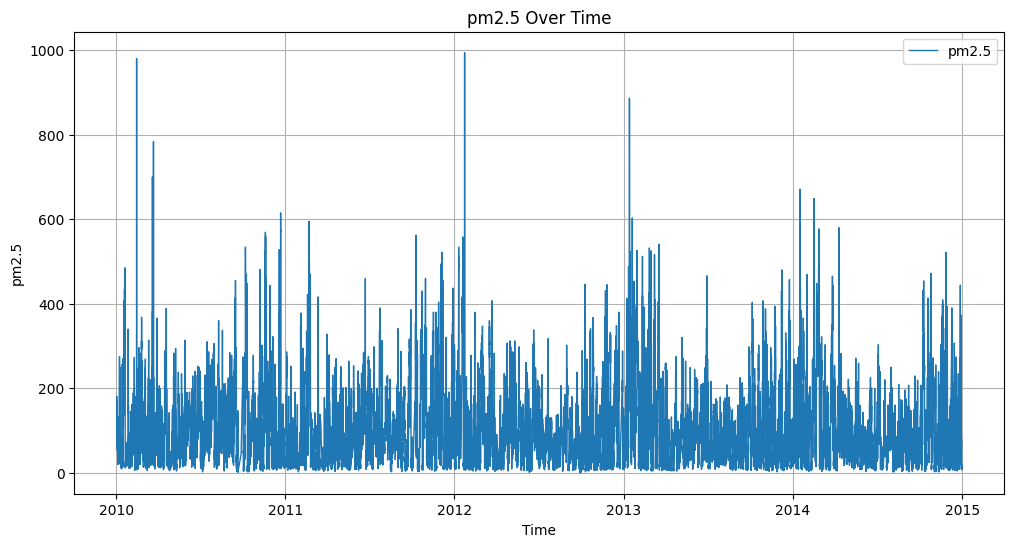

In [7]:
# 繪製折線圖
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['pm2.5'], label='pm2.5', linewidth=1)

# 添加圖表標籤和標題
plt.xlabel('Time')
plt.ylabel('pm2.5')
plt.title('pm2.5 Over Time')
plt.legend()
plt.grid(True)

# 顯示圖表
plt.show()

## 不適合作為pre-train預訓練資料